In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
from obspy.geodetics.base import gps2dist_azimuth

In [2]:
GPSlat = pd.read_csv('gps_lat.csv',names=['AUV','Buoy','Ship'])
GPSlon = pd.read_csv('gps_lon.csv',names=['AUV','Buoy','Ship'])

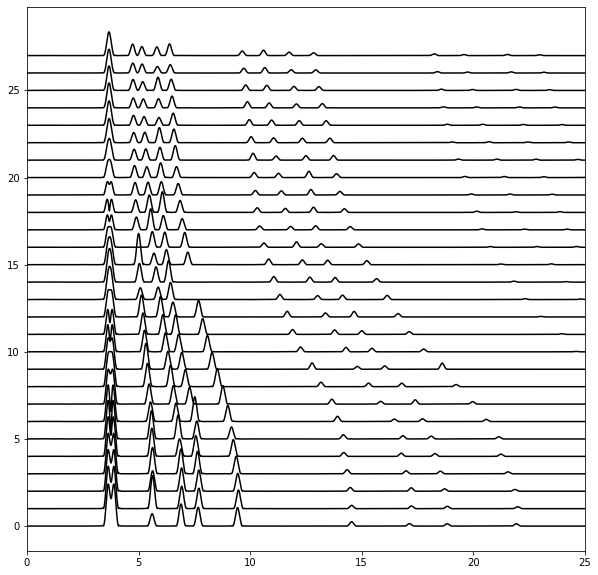

In [145]:
vel = 1533
k=0.0011037653361728
plt.figure(figsize=(10,10))
for i, timepath in enumerate(sorted(glob.glob('raysimu_10/time_0*/envelop.csv'))):
    if i <28:
        Buoy_lat = 25+GPSlat['Buoy'].values[i]/60
        Buoy_lon = 121+GPSlon['Buoy'].values[i]/60
        Ship_lat = 25+GPSlat['Ship'].values[i]/60
        Ship_lon = 121+GPSlon['Ship'].values[i]/60
        dist,az,baz = gps2dist_azimuth(Ship_lat,Ship_lon,Buoy_lat,Buoy_lon)
        # dist/vel
        # print(timepath)
        df = pd.read_csv(timepath)
        
        time = df['time']
        range = time[109999]-time[0]
        data = df['envelop']
        plt.plot(np.linspace(0,range,110000)*1000,data/k+i,'k',lw=1.5)

plt.xlim(0,25)
plt.savefig('RecordPlot_AlignPeak_raysimu10.png',dpi=150)

In [115]:
np.linspace(0,range,110000)

array([  0.00000000e+00,   1.81818182e-06,   3.63636364e-06, ...,
         1.99994545e-01,   1.99996364e-01,   1.99998182e-01])

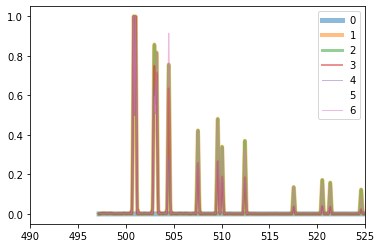

In [87]:
for i, timepath in enumerate(sorted(glob.glob('raysimu_*/time_017/envelop.csv'))):
    if i <29:
        df = pd.read_csv(timepath)
        time = df['time']
        data = df['envelop']
        plt.plot((time)*1000,data/max(data),label=i,alpha=0.5,lw=5-i)
        # plt.plot((time-dist/vel)*1000,data/max(data)+i*0.5,label=i)
        plt.xlim(490,525)
plt.legend()

In [64]:
max(data)

0.0011037653361728